In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [98]:
df=pd.read_csv('Avocado.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [99]:
#dropping the first column as it is irrelevant

df.drop(df.columns[0],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# EDA

In [100]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

So,no null values present in the dataset

In [101]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])

In [104]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
dtype: object

In [105]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [106]:
df_date=pd.DataFrame()
df_date['Month']=df['Date'].dt.month_name()
df_date['Day']=df['Date'].dt.day_name()
df_date['Total Volume']=df['Total Volume']
df_date

,Month,Day,Total Volume
0,December,Sunday,64236.62
1,December,Sunday,54876.98
2,December,Sunday,118220.22
3,June,Friday,78992.15
4,November,Sunday,51039.60
...,...,...,...
1512,October,Sunday,190846.01
1513,September,Saturday,178235.75
1514,February,Wednesday,178410.82
1515,September,Sunday,189131.52


In [107]:
df.drop('Date',axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [108]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


#huge difference between the values in 75% and max under XLarge Bags. So, outliers are present

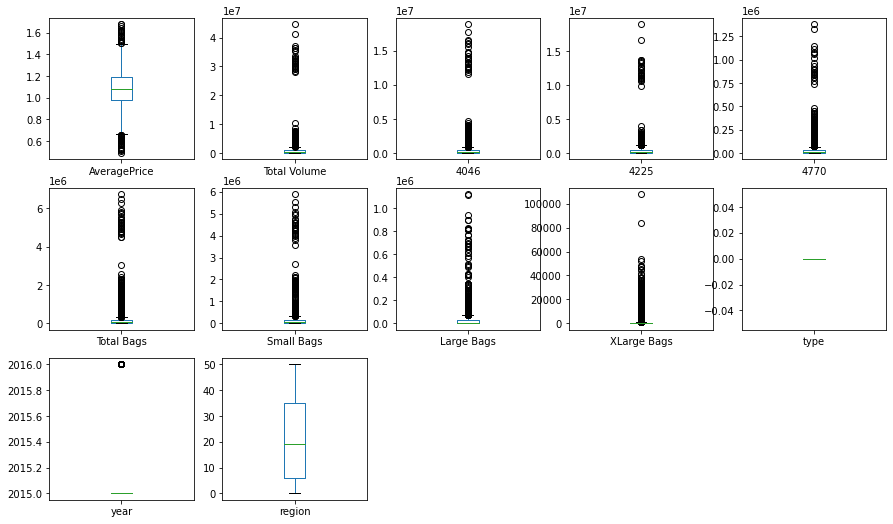

In [109]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,12))
plt.show()

<Figure size 720x576 with 0 Axes>

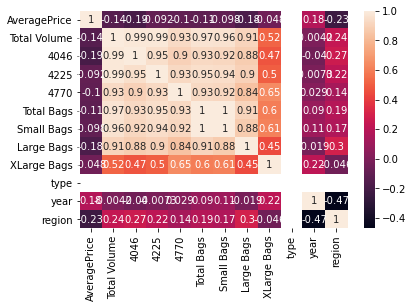

<Figure size 720x576 with 0 Axes>

In [129]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(10,8))

In [122]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


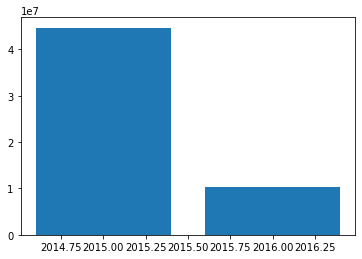

In [131]:
plt.bar(df['year'],df['Total Volume'])
plt.show()

In [132]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AE7E06400>,
      dtype=object)

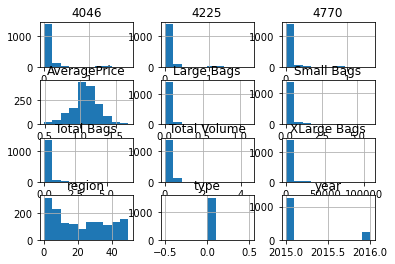

In [133]:
df.hist()

In [134]:
columns=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for col in columns:
    df[col]=np.log1p(df[col])

In [135]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,7.608871,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,7.608871,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,7.608871,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,7.608871,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,7.608871,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0,7.609367,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0,7.609367,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0,7.609367,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0,7.609367,7


# Regression

In [136]:
x=df.drop('AveragePrice',axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,7.608871,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,7.608871,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,7.608871,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,7.608871,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,7.608871,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0,7.609367,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0,7.609367,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0,7.609367,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0,7.609367,7


In [137]:
y=df['AveragePrice']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=60)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)   

In [163]:
print(r2_score(y_test,pred))

0.4161445174948736


In [143]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

0.024647145539088602
0.12389282352473696
